<a href="https://colab.research.google.com/github/Suphattha/KKU_data_mining/blob/master/Data103_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
np1 = np.array([[1,3,5],[2,4,6]])
np1

array([[1, 3, 5],
       [2, 4, 6]])

In [ ]:
np2 = np.array([[1,2],[3,5],[2,0],[4,5]])
np2

array([[1, 2],
       [3, 5],
       [2, 0],
       [4, 5]])

In [ ]:
np2.T

array([[1, 3, 2, 4],
       [2, 5, 0, 5]])

In [ ]:
np2[0,:]

array([1, 2])

##HW 6 สร้าง Distance matrix (Euclidean) ของ np2
โดยสร้าง function สำหรับคำนวณ Euclidean Distance

---
     det Euclidean(data1,data2):

      #process

      return dist

In [ ]:
def Manhattan(data1,data2) : 
      distX = abs(data1[0]-data2[0])
      distY = abs(data1[1]-data2[1])
      return distX+distY

In [ ]:
Manhattan(np2[0,:],np2[1,:])

5

In [ ]:
dist_mat = np.zeros((4,4))
dist_mat 

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
for i in range(4) :
     for j in range(4) :
          dist_mat[i,j] = Manhattan(np2[i,:],np2[j,:])

dist_mat         

array([[0., 5., 3., 6.],
       [5., 0., 6., 1.],
       [3., 6., 0., 7.],
       [6., 1., 7., 0.]])

In [ ]:
def Euclidean(data1,data2):
    distX = pow(abs(data1[0]-data2[0]),2)
    distY = pow(abs(data1[1]-data2[1]),2)
    return distX+distY

In [ ]:
dist_math1 = np.zeros((4,4))
dist_math1

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
for i in range(4) :
     for j in range(4) :
          dist_math1[i,j] = Euclidean(np2[i,:],np2[j,:])
        
dist_math1

array([[ 0., 13.,  5., 18.],
       [13.,  0., 26.,  1.],
       [ 5., 26.,  0., 29.],
       [18.,  1., 29.,  0.]])

# Distance of nominal or categorical features

### (extra) Python data structure (Dictionary)

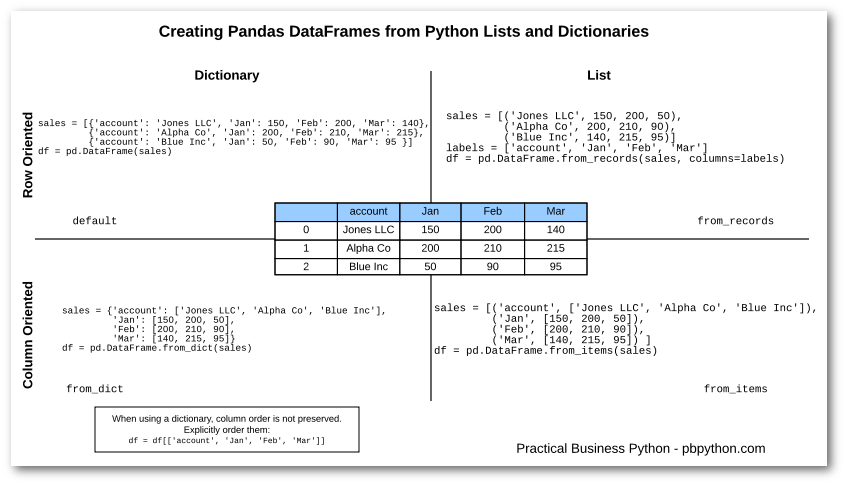

In [1]:
d_A ={'a':1,2:3,3:5,'cat':6}

In [2]:
d_A

{2: 3, 3: 5, 'a': 1, 'cat': 6}

In [3]:
d_A['cat']

6

In [4]:
d_A['dog']=[1,2,3,4,5]

In [5]:
d_A

{2: 3, 3: 5, 'a': 1, 'cat': 6, 'dog': [1, 2, 3, 4, 5]}

In [6]:
del d_A[2]

In [7]:
d_A

{3: 5, 'a': 1, 'cat': 6, 'dog': [1, 2, 3, 4, 5]}

In [8]:
import pandas as pd

In [9]:
data_dict = {'color':['red','red','green'],
             'status':['single','married','single']}
data_dict

{'color': ['red', 'red', 'green'], 'status': ['single', 'married', 'single']}

In [10]:
data_pd = pd.DataFrame.from_dict(data_dict)
data_pd

,color,status
0,red,single
1,red,married
2,green,single


# Categorical feature distance method#1

In [11]:
list(data_pd.iloc[0,:])

['red', 'single']

In [12]:
def meth1_dist(data1,data2):
  N = 0
  print(f'data1 is {data1} and data2 is {data2}')
  for i in range(len(data1)):
    print(f'featurel{i} of data1 is {data1[i]} , featurel{i} of data2 is {data2[i]}')
    if data1[i] != data2[i]:
      N = N+1
      print(f' {data1[i]} is not equal {data2[i]} : updated ({N})')
    else:
      print(f' {data1[i]} is equal {data2[i]}')
  return N/len(data1)

In [13]:
meth1_dist(list(data_pd.iloc[0,:]),list(data_pd.iloc[1,:]))

data1 is ['red', 'single'] and data2 is ['red', 'married']
featurel0 of data1 is red , featurel0 of data2 is red
 red is equal red
featurel1 of data1 is single , featurel1 of data2 is married
 single is not equal married : updated (1)


0.5

# HW7 calculate distance matrix of data_pd using meth1_dist()

### Categorical feature distance method#2

In [14]:
data_pd_binary = pd.get_dummies(data_pd)
data_pd_binary

,color_green,color_red,status_married,status_single
0,0,1,0,1
1,0,1,1,0
2,1,0,0,1


In [15]:
def binary_sym_dist(data1,data2):
  q = 0
  rs = 0
  t = 0
  for i in range(len(data1)):
    if data1[i] == data2[i]:
      if data1[i] == 1:
        q = q + 1
      else:
        t = t + 1
    if data1[i] != data2[i]:
      rs = rs + 1

  return (rs)/(q+rs+t)

In [16]:
binary_sym_dist(list(data_pd_binary.iloc[0,:]),list(data_pd_binary.iloc[1,:]))

0.5

# HW8 calculate distance matrix of data_pd_binary using binary_sym_dist()